## Desafío 1. Estimación mediante Regresión

**MIEMBROS DEL GRUPO**
* Elesgaray Leandro
* Lorenzo Jorge
* Puig Gabriel

#### 1. Importamos las librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df = pd.read_csv('properati_limpio.csv')
df.head()

,Unnamed: 0,precio_aprox_USD,m2_totales,m2_cubiertos,ambientes,USD_m2_new,amenities,cercania,upgrade,country,...,barrio_Village Golf & Tennis Country Club,barrio_Villars,barrio_Virasoro Village,barrio_Virrey del Pino,barrio_Virreyes,barrio_Wilde,barrio_William Morris,barrio_Zelaya,barrio_Zárate,barrio_coordenadas 34.255511
0,0,62000.0,55.0,40.0,2.0,1127.272727,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,72000.0,55.0,55.0,2.0,1309.090909,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,64000.0,35.0,35.0,2.0,1828.571429,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,70000.0,1514.0,1514.0,3.0,46.235139,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,115000.0,39.0,36.0,2.0,2948.717949,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Cargamos el dataset que limpiamos en el desafío 1

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True) # eliminamos la columna que crea automáticamente

In [4]:
for i in df.columns:
    print(i)

precio_aprox_USD
m2_totales
m2_cubiertos
ambientes
USD_m2_new
amenities
cercania
upgrade
country
cercasubte
cercametro
cercatren
tipo_propiedad_apartment
tipo_propiedad_house
tipo_propiedad_store
localidad_Abasto
localidad_Achiras
localidad_Adolfo Alsina
localidad_Agronomía
localidad_Agua Blanca
localidad_Agua de Oro
localidad_Aguas Verdes
localidad_Aldea Brasilera
localidad_Aldea Salto
localidad_Alejandro Roca
localidad_Almafuerte
localidad_Almagro
localidad_Almirante Brown
localidad_Alta Gracia
localidad_Aluminé
localidad_Alvear
localidad_Anisacate
localidad_Apóstoles
localidad_Arequito
localidad_Arocena
localidad_Arroyo Ceibal
localidad_Arroyo Leyes
localidad_Arroyo Seco
localidad_Ascochinga
localidad_Ataliva
localidad_Avellaneda
localidad_Azara
localidad_Azul
localidad_Bahía Blanca
localidad_Balcarce
localidad_Balnearia
localidad_Balvanera
localidad_Banda del Río Salí
localidad_Baradero
localidad_Barracas
localidad_Barranqueras
localidad_Barrio Norte
localidad_Belgrano
localidad_Be

In [5]:
df.shape

(65312, 1147)

#### 3. Creación de variables adicionales

Dado que las variables superficie cubierta y superficie total pueden estar correlacionadas, creamos la variable superficie descubierta como la resta entre ambas variables.

In [6]:
df['m2_descubiertos'] = df['m2_totales'] - df['m2_cubiertos']
df = df.drop(columns = 'm2_totales')

In [7]:
# rango_int=np.percentile(df['m2_cubiertos'], 75)-np.percentile(df['m2_cubiertos'],25)
# max=np.percentile(df['m2_cubiertos'], 75)+1.5*rango_int
# min=np.percentile(df['m2_cubiertos'], 75)-1.5*rango_int
# df.loc[df['m2_cubiertos']>max, 'm2_cubiertos'] = np.nan
# df.loc[df['m2_cubiertos']<min, 'm2_cubiertos'] = np.nan
                   
# df.dropna(inplace=True)
# len(df)

In [8]:
# pasamos a Nan los outliers de m2 cubiertosy dropeamos
df.loc[np.abs(df['m2_cubiertos']-df['m2_cubiertos'].mean()) >=(3*df['m2_cubiertos'].std()),'m2_cubiertos']=np.nan
df.dropna(inplace=True)
len(df)

64521

In [9]:
[print(df[i].value_counts()) for i in df] # analizamos las categorías de cada una de las variables del dataset

120000.00    1123
130000.00     997
85000.00      922
150000.00     922
110000.00     887
140000.00     863
160000.00     828
125000.00     805
250000.00     800
95000.00      776
75000.00      764
135000.00     752
115000.00     721
220000.00     717
90000.00      712
180000.00     659
80000.00      636
170000.00     615
145000.00     591
165000.00     589
350000.00     580
100000.00     579
65000.00      570
230000.00     525
190000.00     525
105000.00     520
200000.00     512
240000.00     501
175000.00     471
70000.00      470
             ... 
441000.00       1
38800.00        1
194360.00       1
105045.00       1
376004.00       1
234381.81       1
93617.11        1
88660.00        1
110390.00       1
180400.00       1
37020.00        1
46800.00        1
172176.88       1
237041.35       1
80640.00        1
314068.59       1
177343.00       1
110351.00       1
192254.84       1
148573.84       1
139187.00       1
85790.00        1
80160.39        1
118552.00       1
93977.00  

0    64520
1        1
Name: localidad_Dina Huapi, dtype: int64
0    64521
Name: localidad_Dorrego, dtype: int64
0    64519
1        2
Name: localidad_Dunamar, dtype: int64
0    64520
1        1
Name: localidad_El Calafate, dtype: int64
0    64521
Name: localidad_El Chaltén, dtype: int64
0    64520
1        1
Name: localidad_El Dorado, dtype: int64
0    64520
1        1
Name: localidad_El Manzano, dtype: int64
0    64520
1        1
Name: localidad_El Sauce, dtype: int64
0    64521
Name: localidad_El Trapiche, dtype: int64
0    64520
1        1
Name: localidad_El Volcán, dtype: int64
0    64521
Name: localidad_Embalse, dtype: int64
0    64521
Name: localidad_Emilia, dtype: int64
0    64520
1        1
Name: localidad_Empalme Villa Constitución, dtype: int64
0    64517
1        4
Name: localidad_Ensenada, dtype: int64
0    64503
1       18
Name: localidad_Escalante, dtype: int64
0    63561
1      960
Name: localidad_Escobar, dtype: int64
0    64516
1        5
Name: localidad_Esperanza, dty

0    64518
1        3
Name: localidad_Nono, dtype: int64
0    64515
1        6
Name: localidad_Nueva Atlantis, dtype: int64
0    64521
Name: localidad_Nueva Ciudad, dtype: int64
0    64520
1        1
Name: localidad_Nueve de Julio, dtype: int64
0    64009
1      512
Name: localidad_Nuñez, dtype: int64
0    64520
1        1
Name: localidad_Oberá, dtype: int64
0    64521
Name: localidad_Obispo Trejo, dtype: int64
0    64520
1        1
Name: localidad_Olavarría, dtype: int64
0    64520
1        1
Name: localidad_Oliva, dtype: int64
0    64520
1        1
Name: localidad_Oliveros, dtype: int64
0    64515
1        6
Name: localidad_Oncativo, dtype: int64
0    64398
1      123
Name: localidad_Once, dtype: int64
0    64520
1        1
Name: localidad_Oro Verde, dtype: int64
0    64511
1       10
Name: localidad_Ostende, dtype: int64
0    62058
1     2463
Name: localidad_Palermo, dtype: int64
0    64521
Name: localidad_Pampa del Infierno, dtype: int64
0    64496
1       25
Name: localidad_Paraná

Name: localidad_Ushuaia, dtype: int64
0    64521
Name: localidad_Uspallata, dtype: int64
0    64475
1       46
Name: localidad_Valeria del Mar, dtype: int64
0    64517
1        4
Name: localidad_Valle Hermoso, dtype: int64
0    64520
1        1
Name: localidad_Veinticinco de Mayo, dtype: int64
0    64489
1       32
Name: localidad_Velez Sarsfield, dtype: int64
0    64521
Name: localidad_Venado Tuerto, dtype: int64
0    64483
1       38
Name: localidad_Versalles, dtype: int64
0    61979
1     2542
Name: localidad_Vicente López, dtype: int64
0    64518
1        3
Name: localidad_Victoria, dtype: int64
0    64516
1        5
Name: localidad_Viedma, dtype: int64
0    64452
1       69
Name: localidad_Villa Allende, dtype: int64
0    64520
1        1
Name: localidad_Villa Amancay, dtype: int64
0    64521
Name: localidad_Villa Belgrano, dtype: int64
0    64193
1      328
Name: localidad_Villa Carlos Paz, dtype: int64
0    64519
1        2
Name: localidad_Villa Cerro Azul, dtype: int64
0    645

0    64520
1        1
Name: barrio_Barrio Privado Santa Rita, dtype: int64
0    64519
1        2
Name: barrio_Barrio Privado Villa Olivos, dtype: int64
0    64510
1       11
Name: barrio_Barrio San Agustin, dtype: int64
0    64520
1        1
Name: barrio_Barrio San Alfonso - Pilar del Este, dtype: int64
0    64520
1        1
Name: barrio_Barrio San Benito, dtype: int64
0    64520
1        1
Name: barrio_Barrio San Eduardo - Pilar del Este, dtype: int64
0    64483
1       38
Name: barrio_Barrio San Gabriel, dtype: int64
0    64516
1        5
Name: barrio_Barrio San Isidro Labrador, dtype: int64
0    64517
1        4
Name: barrio_Barrio San Juan, dtype: int64
0    64520
1        1
Name: barrio_Barrio San Marco, dtype: int64
0    64514
1        7
Name: barrio_Barrio San Matías, dtype: int64
0    64494
1       27
Name: barrio_Barrio San Rafael, dtype: int64
0    64513
1        8
Name: barrio_Barrio Santa Clara, dtype: int64
0    64513
1        8
Name: barrio_Barrio Santa Guadalupe - Pilar 

Name: barrio_La Reja, dtype: int64
0    64505
1       16
Name: barrio_La Tablada, dtype: int64
0    64515
1        6
Name: barrio_La Unión, dtype: int64
0    64512
1        9
Name: barrio_La horqueta de Echeverría, dtype: int64
0    64521
Name: barrio_Laguna de los Padres, dtype: int64
0    64513
1        8
Name: barrio_Laguna del Sol, dtype: int64
0    63996
1      525
Name: barrio_Lanús, dtype: int64
0    64486
1       35
Name: barrio_Lanús Este, dtype: int64
0    64389
1      132
Name: barrio_Lanús Oeste, dtype: int64
0    64518
1        3
Name: barrio_Larena Country Club, dtype: int64
0    64521
Name: barrio_Las Chacras, dtype: int64
0    64517
1        4
Name: barrio_Las Golondrinas, dtype: int64
0    64517
1        4
Name: barrio_Libertad, dtype: int64
0    64521
Name: barrio_Lima, dtype: int64
0    64520
1        1
Name: barrio_Lisandro Olmos, dtype: int64
0    64459
1       62
Name: barrio_Llavallol, dtype: int64
0    64499
1       22
Name: barrio_Lobos, dtype: int64
0    64501

0    64519
1        2
Name: barrio_Talar del lago 2, dtype: int64
0    64507
1       14
Name: barrio_Tandil, dtype: int64
0    64506
1       15
Name: barrio_Tapiales, dtype: int64
0    64209
1      312
Name: barrio_Temperley, dtype: int64
0    64520
1        1
Name: barrio_Terminal Nueva, dtype: int64
0    64516
1        5
Name: barrio_Terminal Vieja, dtype: int64
0    64520
1        1
Name: barrio_Terralagos, dtype: int64
0    64517
1        4
Name: barrio_Terravista Barrio Privado, dtype: int64
0    64521
Name: barrio_The Boating Club, dtype: int64
0    63779
1      742
Name: barrio_Tigre, dtype: int64
0    64494
1       27
Name: barrio_Tolosa, dtype: int64
0    64520
1        1
Name: barrio_Torres, dtype: int64
0    64505
1       16
Name: barrio_Torreón, dtype: int64
0    64517
1        4
Name: barrio_Tortugas Country Club, dtype: int64
0    64483
1       38
Name: barrio_Tortuguitas, dtype: int64
0    64517
1        4
Name: barrio_Trenque Lauquen, dtype: int64
0    64492
1       29


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
# eliminamos todas las features que tienen todos 0
all_zeros = list(df.columns[(df == 0).all()])
df = df.drop(columns = all_zeros)

#### 4. Análisis de correlación de variables

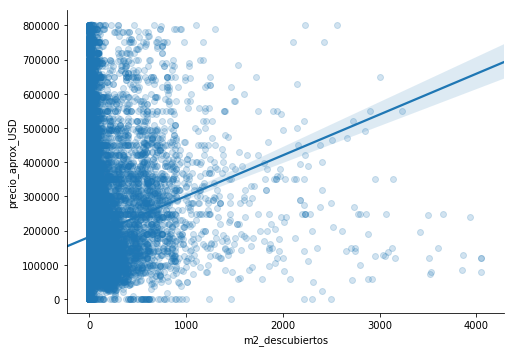

In [11]:
sns.lmplot(x = 'm2_descubiertos', y = 'precio_aprox_USD', data = df, aspect=1.45,\
                                scatter_kws={'alpha':0.2})

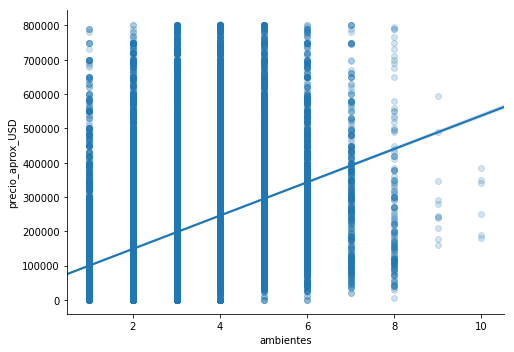

In [12]:
sns.lmplot(x = 'ambientes', y = 'precio_aprox_USD', data = df, aspect=1.45,\
                                scatter_kws={'alpha':0.2})

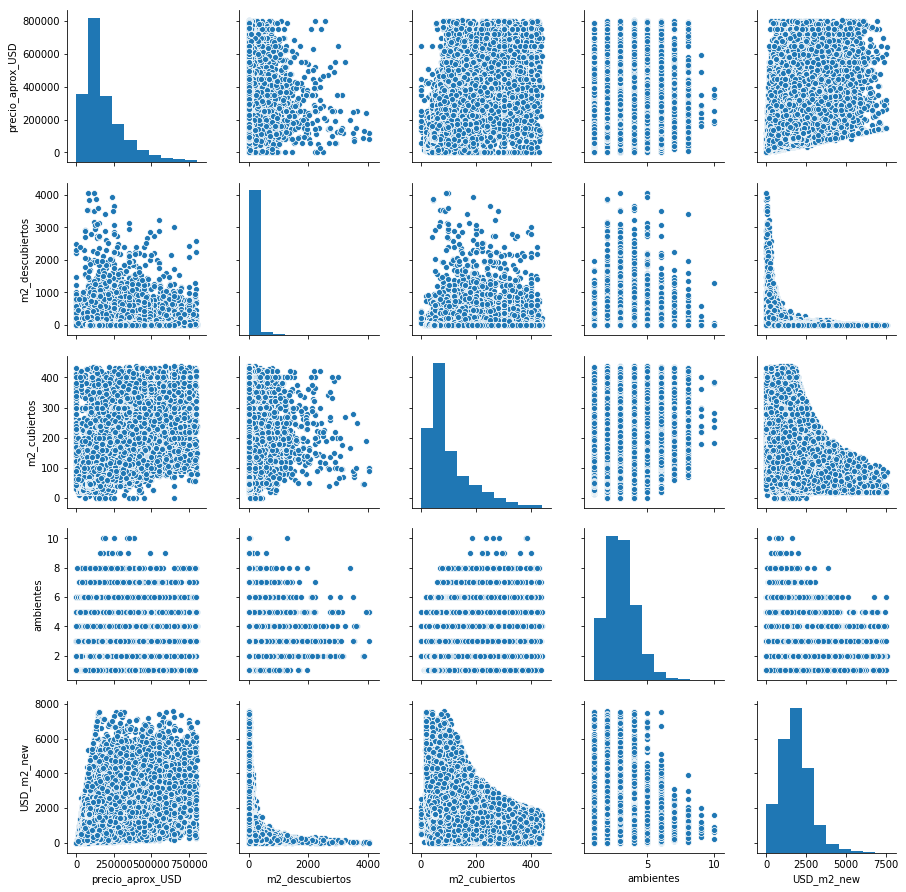

In [13]:
vars = df[['precio_aprox_USD', 'm2_descubiertos', 'm2_cubiertos', 'ambientes','USD_m2_new']]
sns.pairplot(data = vars)

In [14]:
df.isnull().sum()

precio_aprox_USD                             0
m2_cubiertos                                 0
ambientes                                    0
USD_m2_new                                   0
amenities                                    0
cercania                                     0
upgrade                                      0
country                                      0
cercasubte                                   0
cercametro                                   0
cercatren                                    0
tipo_propiedad_apartment                     0
tipo_propiedad_house                         0
tipo_propiedad_store                         0
localidad_Abasto                             0
localidad_Achiras                            0
localidad_Agronomía                          0
localidad_Agua Blanca                        0
localidad_Agua de Oro                        0
localidad_Aguas Verdes                       0
localidad_Aldea Brasilera                    0
localidad_Alm

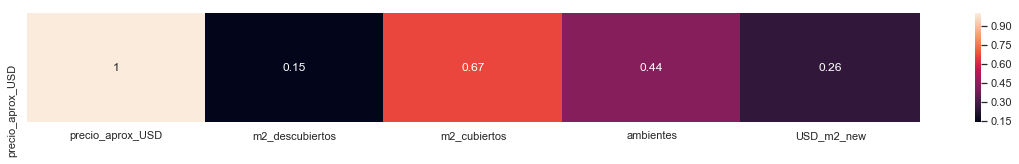

In [15]:
df_muestra = df[['precio_aprox_USD', 'm2_descubiertos', 'm2_cubiertos', 'ambientes', 'USD_m2_new']]
#Graficamos la matriz de correlacion, pero sólo la línea de la variable explicativa
sns.set(rc={'figure.figsize':(20,2)})
sns.heatmap(df_muestra.corr().iloc[[0]], annot=True)

### Análisis de componentes principales

In [16]:
df_PCA = df.copy()
df_PCA = df.loc[:, ['precio_aprox_USD', 'm2_descubiertos', 'm2_cubiertos', 'ambientes', 'USD_m2_new']]
df_PCA = df_PCA.reset_index(drop=True)
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64521 entries, 0 to 64520
Data columns (total 5 columns):
precio_aprox_USD    64521 non-null float64
m2_descubiertos     64521 non-null float64
m2_cubiertos        64521 non-null float64
ambientes           64521 non-null float64
USD_m2_new          64521 non-null float64
dtypes: float64(5)
memory usage: 2.5 MB


In [17]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
scaler.fit(df_PCA)
df_PCA = scaler.transform(df_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=['precio_aprox_USD', 'm2_descubiertos', 'm2_cubiertos', 'ambientes', 'USD_m2_new'])
df_PCA.head()

,precio_aprox_USD,m2_descubiertos,m2_cubiertos,ambientes,USD_m2_new
0,-0.909107,-0.156782,-0.784345,-0.633895,-0.766063
1,-0.836286,-0.246035,-0.592309,-0.633895,-0.579130
2,-0.894543,-0.246035,-0.848357,-0.633895,-0.045035
3,-0.523154,-0.228184,-0.835555,-0.633895,1.106625
4,-0.547185,-0.127031,-0.912369,-1.445281,0.371800


In [18]:
# Observamos la media de las variables:
print("Media de las variables: ")
print(df_PCA.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df_PCA.var(axis=0))

Media de las variables: 
precio_aprox_USD    9.159198e-17
m2_descubiertos     3.328508e-14
m2_cubiertos        1.833061e-16
ambientes          -7.754211e-15
USD_m2_new          1.079171e-15
dtype: float64


Varianza de las variables: 
precio_aprox_USD    1.000015
m2_descubiertos     1.000015
m2_cubiertos        1.000015
ambientes           1.000015
USD_m2_new          1.000015
dtype: float64


In [19]:
from sklearn.decomposition import PCA
PCA = PCA()
PCA.fit(df_PCA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(PCA.components_)

[[ 0.49232219  0.29375608  0.60640464  0.50078616 -0.22981047]
 [-0.50651802  0.43776733 -0.01657462 -0.07769259 -0.73857187]
 [ 0.24301481  0.80579713 -0.13618338 -0.38403802  0.35440609]
 [-0.22845937  0.25122653 -0.4840618   0.7713665   0.23530714]
 [-0.62434644  0.09820058  0.61574098  0.02618419  0.46981444]]


In [21]:
PCA_loadings = pd.DataFrame(PCA.components_.T, index=df_PCA.columns,\
                            columns=['PC1', 'PC2','PC3', 'PC4','PC5'])
PCA_loadings

,PC1,PC2,PC3,PC4,PC5
precio_aprox_USD,0.492322,-0.506518,0.243015,-0.228459,-0.624346
m2_descubiertos,0.293756,0.437767,0.805797,0.251227,0.098201
m2_cubiertos,0.606405,-0.016575,-0.136183,-0.484062,0.615741
ambientes,0.500786,-0.077693,-0.384038,0.771366,0.026184
USD_m2_new,-0.229810,-0.738572,0.354406,0.235307,0.469814


In [22]:
print(PCA.explained_variance_)
print(PCA.explained_variance_ratio_)

[2.23791668 1.33896218 0.79480885 0.5267191  0.10167068]
[0.4475764  0.26778829 0.15895931 0.10534219 0.02033382]


In [23]:
df_pca = pd.DataFrame(PCA.fit_transform(df_PCA), columns=['PC1', 'PC2','PC3', 'PC4','PC5'],\
                      index=df_PCA.index)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.110656,1.019887,-0.268504,-0.121247,-0.307257
1,-1.027531,0.802683,-0.282629,-0.209277,-0.155419
2,-1.334222,0.441968,-0.072630,0.053651,-0.025780
3,-1.403035,-0.589129,0.438419,0.238085,0.293046
4,-1.669192,0.074358,0.575725,-0.492615,-0.095792


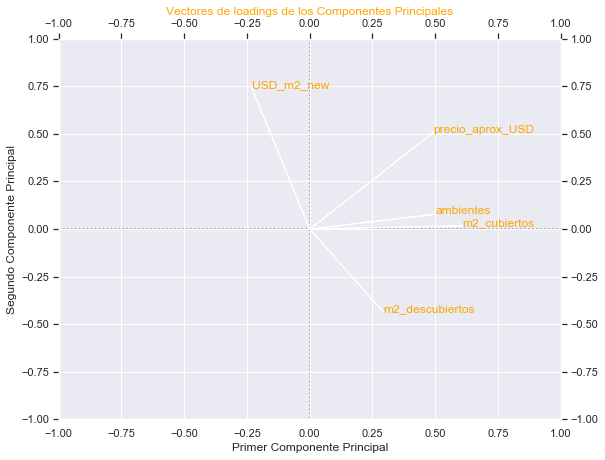

In [24]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# Ploteamos los Componentes Principales 1 y 2
#for i in df_pca.index:
#  ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in PCA_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (PCA_loadings.PC1.loc[i], -PCA_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,PCA_loadings.PC1[0], -PCA_loadings.PC2[0])
ax2.arrow(0,0,PCA_loadings.PC1[1], -PCA_loadings.PC2[1])
ax2.arrow(0,0,PCA_loadings.PC1[2], -PCA_loadings.PC2[2])
ax2.arrow(0,0,PCA_loadings.PC1[3], -PCA_loadings.PC2[3])
ax2.arrow(0,0,PCA_loadings.PC1[4], -PCA_loadings.PC2[4]);


#### 5. Estimaciones de regresión lineal y regularizada

### MODELO PARA TODO EL PAÍS

#### MODELO 1: TODAS LAS VARIABLES

#### Paso 1: Cargamos las librerías

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

#### Paso 2: Generamos la matriz de features y el vector de target

In [26]:
X = df.drop(columns = ['precio_aprox_USD', 'USD_m2_new'])
y = df[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1, \
                                                    stratify = X[['provincia_Capital Federal', \
                                                                 'provincia_Bs.As. G.B.A. Zona Sur',\
                                                                 'provincia_Córdoba', 'provincia_Santa Fe']] ,\
                                                    random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


print('Distribución CABA en set de entrenamiento')
print(X_train['provincia_Capital Federal'].value_counts(normalize=True))
print('\n')
print('Distribución CABA en set de testeo')
print(X_test['provincia_Capital Federal'].value_counts(normalize=True))

# normalizamos el set de entrenamiento y de testeo
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(58068, 911) (58068, 1)
(6453, 911) (6453, 1)
Distribución CABA en set de entrenamiento
0    0.679049
1    0.320951
Name: provincia_Capital Federal, dtype: float64


Distribución CABA en set de testeo
0    0.679064
1    0.320936
Name: provincia_Capital Federal, dtype: float64


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


#### Paso 4: Seleccionamos los modelos a evaluar

In [28]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.01, 0.95, 30)
al_lasso = np.linspace(0.1, 0.5, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression(normalize = False)
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [29]:
# Hacemos el fit de la regresión lineal
model = lm.fit(X_train, y_train)
model.score(X_train, y_train)

0.691825010134651

In [30]:
predicitions = model.predict(X_test)
model.score(X_test, y_test)

-2.5384889554518215e+21

In [31]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print ("EMC:", mean_squared_error(y_test, predictions))
print (model.summary())

EMC: 40473625997.79124
                            OLS Regression Results                            
Dep. Variable:       precio_aprox_USD   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     20.94
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:29:57   Log-Likelihood:            -7.9171e+05
No. Observations:               58068   AIC:                         1.585e+06
Df Residuals:                   57191   BIC:                         1.593e+06
Df Model:                         877                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.736e+04   1378.

In [32]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.01   , 0.04241, 0.07483, 0.10724, 0.13966, 0.17207, 0.20448,
       0.2369 , 0.26931, 0.30172, 0.33414, 0.36655, 0.39897, 0.43138,
       0.46379, 0.49621, 0.52862, 0.56103, 0.59345, 0.62586, 0.65828,
       0.69069, 0.7231 , 0.75552, 0.78793, 0.82034, 0.85276, 0.88517,
       0.91759, 0.95   ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [33]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

LassoCV(alphas=array([0.1    , 0.11379, 0.12759, 0.14138, 0.15517, 0.16897, 0.18276,
       0.19655, 0.21034, 0.22414, 0.23793, 0.25172, 0.26552, 0.27931,
       0.2931 , 0.3069 , 0.32069, 0.33448, 0.34828, 0.36207, 0.37586,
       0.38966, 0.40345, 0.41724, 0.43103, 0.44483, 0.45862, 0.47241,
       0.48621, 0.5    ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [34]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha Ridge: 0.95 
Alpha LASSO: 0.34827586206896555 



In [35]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso))

 Score Train Lineal: 0.69
 Score Train Ridge : 0.69
 Score Train Lasso : 0.69

 Train RMSE lineal   : 76291.10 
 Train RMSE Ridge    : 76166.62 
 Train RMSE Lasso    : 76166.73 



Parámetros del modelo

In [36]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([186930.975]),
 array([[ 9.736e+04,  1.472e+04,  6.174e+03, -1.244e+03,  7.054e+03,
          1.741e+03, -1.157e+03, -3.032e+03, -7.242e+01,  1.302e+04,
         -8.225e+03,  1.345e+03, -1.244e+03,  1.619e+02, -9.662e+02,
         -9.782e+02, -3.145e+02, -3.889e+02, -9.900e+02, -3.961e+03,
          3.765e+03, -1.070e+03,  9.126e+01, -1.062e+03,  6.130e+02,
         -8.582e+01,  7.019e+00, -6.282e+02, -1.404e+03, -9.363e+02,
          3.200e+02, -7.249e+02, -1.062e+03, -5.003e+03, -4.203e+01,
         -2.952e+03, -3.538e+16,  5.005e+03,  8.589e+03,  4.202e+02,
          8.449e+03, -1.235e+03, -8.017e+02, -4.009e+03, -3.612e+03,
         -7.114e+16,  2.534e+03,  2.655e+03, -2.371e+03,  3.056e+16,
         -6.715e+01, -2.436e+02, -5.018e+02, -3.356e+02, -1.095e+02,
         -3.970e+02,  2.533e+03, -1.676e+03, -7.951e+02,  2.609e+03,
         -4.925e+14, -8.332e+02, -7.563e+02,  8.759e+16,  1.634e+16,
          1.014e+03,  2.234e+15, -1.878e+03, -3.865e+02, -1.459e+03,
          7.

In [37]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([186927.613]),
 array([[97359.092, 14659.517,  6156.789, -1249.036,  7047.417,  1809.276,
         -1175.049, -2995.592,   -44.154, 13010.316, -8214.64 ,  1364.931,
         -1393.748,   248.792,  -987.641,  -933.114,  -356.921,  -530.207,
          -979.029, -4049.735,  4189.295, -1293.914,    13.288,  -922.422,
           701.853,  -108.113,  -106.745,  -642.654, -1295.524,  -922.761,
           170.207,  -626.222, -1038.976, -5007.056,   106.318, -2939.647,
          -105.097,  4984.269,  8592.203,   422.573,  8478.588, -1213.515,
          -718.768, -3541.293, -3768.142,   169.673,  2615.389,  2499.285,
         -2318.339,  -840.938,  -160.857,  -288.341,  -453.726,  -212.668,
          -169.377,  -543.009,  2509.867, -1440.12 ,  -734.211,  2594.233,
           173.173,  -742.167,  -950.306,     0.   ,  -177.701,   935.303,
           102.835, -1675.692,  -273.511, -1590.506,   165.866,  -193.551,
           143.986,  -255.436,   193.145,  -742.644,  -171.933,  -636.594,
   

In [38]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)


(186927.61292605224,
 array([97365.524, 14656.326,  6156.925, -1248.429,  7046.03 ,  1809.24 ,
        -1175.201, -2995.635,   -44.125, 13015.181, -8212.341,  1364.774,
        -1389.664,   248.543,  -984.891,  -932.353,  -356.462,  -659.663,
         -974.355, -4037.824,  4155.293, -1293.43 ,    18.202,  -921.861,
          700.5  ,  -102.528,  -101.135,  -642.285, -1312.366,  -923.544,
          170.073,  -624.53 , -1038.109, -4997.529,   106.076, -2932.031,
         -249.877,  4995.353,  8608.558,   421.68 ,  8459.464, -1211.725,
         -718.195, -3536.436, -3759.975,    -0.   ,  2614.865,  2499.106,
        -2301.292, -1258.181,  -160.349,  -362.926,  -451.313,  -212.151,
         -170.092,  -542.486,  2509.365, -1414.083,  -732.853,  2313.416,
           54.883,  -737.519,  -944.728,     0.   ,  -400.526,   925.589,
           -0.052, -1670.281,  -272.961, -1585.026,    90.56 ,  -172.352,
            0.015,  -246.444,    42.911,  -736.75 ,  -164.754,  -781.462,
        -1025.032

In [39]:
lasso = pd.DataFrame(lm_lasso_cv.coef_, index = X.columns)
lasso

,0
m2_cubiertos,97365.523740
ambientes,14656.325576
amenities,6156.924820
cercania,-1248.428632
upgrade,7046.029799
country,1809.239909
cercasubte,-1175.201034
cercametro,-2995.635025
cercatren,-44.124987
tipo_propiedad_apartment,13015.180908


### Paso 5: Hacer la estimación sobre Test set

In [40]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)


print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso))

 Score Test Lineal: -2538488955451821522944.00
 Score Test Ridge : 0.66
 Score Test Lasso : 0.66

 Test RMSE lineal= 6870432707613406.00
 Test RMSE Ridge = 79207.10
 Test RMSE Lasso = 79206.09


#### MODELO 2: VARIABLES SELECCIONADAS

#### Paso 1: Seleccionamos las variables relevantes

Vamos a dropear las siguientes variables para el análisis
* Quitamos las variables de cercania a subtes, estaciones y metrobus de CABA, dado que entendemos que no sería representativa a nivel nacional
* Quitamos la variable `ambientes` dado que correlaciona en mayor medida con m2 cubiertos
* Quitamos barrio

In [41]:
features = df.copy()
features.drop(columns = ['precio_aprox_USD','USD_m2_new', 'm2_descubiertos', 'cercasubte', 'cercametro',\
                              'cercatren', 'upgrade'], inplace = True)
features.drop(list(df.filter(regex = 'barrio')), axis = 1, inplace = True)
features.drop(list(df.filter(regex = 'localidad')), axis = 1, inplace = True)

In [42]:
len(features.columns)

35

In [43]:
features.head()

,m2_cubiertos,ambientes,amenities,cercania,country,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,provincia_Bs.As. G.B.A. Zona Oeste,provincia_Bs.As. G.B.A. Zona Sur,...,provincia_Neuquén,provincia_Río Negro,provincia_Salta,provincia_San Juan,provincia_San Luis,provincia_Santa Cruz,provincia_Santa Fe,provincia_Santiago Del Estero,provincia_Tierra Del Fuego,provincia_Tucumán
0,40.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.0,2.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36.0,2.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,30.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Paso 2: Generamos la matriz de features y el vector de target

In [44]:
X = features
y = df[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1,  \
                                                    stratify = X[['provincia_Capital Federal', \
                                                                 'provincia_Bs.As. G.B.A. Zona Sur',\
                                                                 'provincia_Córdoba', 'provincia_Santa Fe']] ,\
                                                    random_state=16)
print(X_train.shape, y_train.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
scaler = StandardScaler()

# normalizamos el set de entrenamiento y de testeo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(58068, 35) (58068, 1)
(58068, 35) (58068, 1)
(6453, 35) (6453, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [46]:
X_train.std()

1.0000000000000002

#### Paso 4: Seleccionamos los modelos a evaluar

In [47]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.01, 0.7, 150)
al_lasso = np.linspace(0.2, 0.7, 150)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [48]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.5830779759504113

In [49]:
lm.predict(X_test)
lm.score(X_test, y_test)

0.5622524873269317

In [50]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print ("EMC:", mean_squared_error(y_test, predictions))
print (model.summary())

EMC: 42399988347.72523
                            OLS Regression Results                            
Dep. Variable:       precio_aprox_USD   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     426.5
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:37:52   Log-Likelihood:            -7.9315e+05
No. Observations:               58068   AIC:                         1.586e+06
Df Residuals:                   58033   BIC:                         1.587e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.06e+05   1327.

In [51]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.01   , 0.01463, ..., 0.69537, 0.7    ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [52]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.2    , 0.20336, ..., 0.69664, 0.7    ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [53]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha Ridge: 0.7 
Alpha LASSO: 0.7 



In [54]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso))

 Score Train Lineal: 0.58
 Score Train Ridge : 0.58
 Score Train Lasso : 0.58

 Train RMSE lineal   : 88736.56 
 Train RMSE Ridge    : 88736.56 
 Train RMSE Lasso    : 88736.56 



Parámetros del modelo

In [55]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([186927.613]),
 array([[105986.646,  14079.861,  10361.837,  -1730.763,    237.463,
          26651.374,  -6907.613,   1373.964, -16190.511, -14298.353,
         -16771.117,  -8115.583,   3141.998,     59.531,  -2158.46 ,
           -671.792,  -2998.518, -22323.149,  -2129.921,   -325.371,
            -15.772,   -988.098,  -1265.654,  -4659.269,  -5911.909,
          -1180.249,  -1178.275,  -3309.701,   -145.5  ,  -1218.608,
          -1993.212, -13562.169,  -1072.098,   -752.631,  -3916.029]]))

In [56]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([186927.613]),
 array([[105983.7  ,  14080.474,  10362.148,  -1730.772,    237.638,
          26650.08 ,  -6906.886,   1374.027, -16190.228, -14297.944,
         -16770.68 ,  -8115.411,   3142.486,     59.538,  -2158.409,
           -671.729,  -2998.451, -22322.547,  -2129.884,   -325.36 ,
            -15.748,   -988.077,  -1265.626,  -4659.089,  -5911.813,
          -1180.225,  -1178.194,  -3309.621,   -145.487,  -1218.611,
          -1993.165, -13561.81 ,  -1072.059,   -752.624,  -3915.933]]))

In [57]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)


(186927.61292605224,
 array([105985.442,  14079.93 ,  10361.74 ,  -1729.926,    236.927,
         26655.415,  -6902.585,   1373.765, -16188.611, -14296.35 ,
        -16769.097,  -8114.391,   3143.686,     58.864,  -2157.692,
          -670.885,  -2997.459, -22321.38 ,  -2129.118,   -324.651,
           -15.028,   -987.358,  -1264.936,  -4658.268,  -5911.012,
         -1179.216,  -1177.226,  -3308.869,   -144.77 ,  -1217.801,
         -1992.462, -13560.663,  -1071.362,   -751.862,  -3915.164]))

### Paso 6: Hacer la estimación sobre Test set

In [58]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)


print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso))

 Score Test Lineal: 0.56
 Score Test Ridge : 0.56
 Score Test Lasso : 0.56

 Test RMSE lineal= 90221.14
 Test RMSE Ridge = 90221.06
 Test RMSE Lasso = 90221.21


### Paso 7: Hacer la estimación sobre toda la muestra

In [59]:
lm_ridge_cv.fit(X, np.ravel(y))
lm_ridge_cv.score(X,np.ravel(y))

0.5810663442219177

### MODELO PARA CABA

In [60]:
# creamos una copia y nos quedamos con los registros necesarios
df_caba = df.copy()
df_caba = df_caba[df_caba['provincia_Capital Federal'] == 1]
len(df_caba) # nos quedamos con 20774 registros de CABA

20708

In [61]:
df_caba.columns

Index(['precio_aprox_USD', 'm2_cubiertos', 'ambientes', 'USD_m2_new',
       'amenities', 'cercania', 'upgrade', 'country', 'cercasubte',
       'cercametro',
       ...
       'barrio_Villars', 'barrio_Virasoro Village', 'barrio_Virrey del Pino',
       'barrio_Virreyes', 'barrio_Wilde', 'barrio_William Morris',
       'barrio_Zelaya', 'barrio_Zárate', 'barrio_coordenadas 34.255511',
       'm2_descubiertos'],
      dtype='object', length=913)

In [62]:
len(df.filter(regex = 'provincia').columns) # son 28 columnas de provincias porque provinca de Buenos Aires está dividido

27

Quitamos las columnas de provincias

In [63]:
df_caba = df_caba.drop(list(df.filter(regex = 'provincia')), axis = 1)

In [64]:
len(df_caba.columns) # observamos que se borraron 28 columnas

886

In [65]:
# eliminamos todas las features que tienen todos 0
all_zeros = list(df_caba.columns[(df_caba == 0).all()])
df_caba = df_caba.drop(columns = all_zeros)

#### MODELO 1: TODAS LAS VARIABLES

#### Paso 2: Generamos la matriz de features y el vector de target

In [66]:
X = df_caba.drop(columns = ['precio_aprox_USD', 'USD_m2_new'])
y = df_caba[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(16566, 74) (16566, 1)
(4142, 74) (4142, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


#### Paso 4: Seleccionamos los modelos a evaluar

In [68]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 10, 30)
al_lasso = np.linspace(0.01,25, 30)
al_elastic = np.linspace(0.001, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [69]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.7454470718545139

In [70]:
lm.predict(X_test)
lm.score(X_test, y_test)

0.7325517817169841

In [71]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(lm, X_train, y_train, cv=cv, scoring='r2')
scores, scores.mean()

(array([0.764, 0.716, 0.752, 0.74 , 0.735]), 0.7413437601657459)

In [72]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.001  ,  0.34579,  0.69059,  1.03538,  1.38017,  1.72497,
        2.06976,  2.41455,  2.75934,  3.10414,  3.44893,  3.79372,
        4.13852,  4.48331,  4.8281 ,  5.1729 ,  5.51769,  5.86248,
        6.20728,  6.55207,  6.89686,  7.24166,  7.58645,  7.93124,
        8.27603,  8.62083,  8.96562,  9.31041,  9.65521, 10.     ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [73]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, np.ravel(y_train))

LassoCV(alphas=array([ 0.01   ,  0.87172,  1.73345,  2.59517,  3.4569 ,  4.31862,
        5.18034,  6.04207,  6.90379,  7.76552,  8.62724,  9.48897,
       10.35069, 11.21241, 12.07414, 12.93586, 13.79759, 14.65931,
       15.52103, 16.38276, 17.24448, 18.10621, 18.96793, 19.82966,
       20.69138, 21.5531 , 22.41483, 23.27655, 24.13828, 25.     ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [74]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, np.ravel(y_train))

ElasticNetCV(alphas=array([ 0.01   ,  0.87172,  1.73345,  2.59517,  3.4569 ,  4.31862,
        5.18034,  6.04207,  6.90379,  7.76552,  8.62724,  9.48897,
       10.35069, 11.21241, 12.07414, 12.93586, 13.79759, 14.65931,
       15.52103, 16.38276, 17.24448, 18.10621, 18.96793, 19.82966,
       20.69138, 21.5531 , 22.41483, 23.27655, 24.13828, 25.     ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [75]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 8.276034482758622 
Alpha LASSO: 20.69137931034483 
Alpha Elastic Net: 0.01


In [76]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.75
 Score Train Ridge : 0.75
 Score Train Lasso : 0.75
 Score Train ElasticNet : 0.75

 Train RMSE lineal   : 71331.81 
 Train RMSE Ridge    : 71331.99 
 Train RMSE Lasso    : 71333.21 
 Train RMSE ElasticNet    : 71345.07 



Parámetros del modelo

In [77]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([198604.083]),
 array([[94245.511, 20879.309,  5941.609, -2164.948,  7992.778,   229.025,
         -2226.08 , -4008.581,   322.382, 11507.387, -9453.692,  4963.825,
           514.207,  -660.765,  2182.947, -2009.043,  -354.129, 15233.021,
         25755.127, -2717.022,  1521.397,  8746.625,    -0.   ,  1921.598,
          2138.226,  2934.427,  4951.203, -1160.076,  -741.957,  1095.322,
         -1636.17 , 10330.923,  -140.195, -3724.57 ,   610.709,  -220.205,
         11630.266,  -594.618, 30547.802, -1385.692,   482.359,  -392.838,
          1014.413, -1419.937,   486.688, -4057.494, 31996.114, 23794.361,
          5462.609,  5176.299,   261.27 ,   949.925,  3332.903,   489.592,
          -677.261,   592.635,  6728.584,  3655.358,   -85.822, -4146.312,
           109.61 ,  1093.454,  1852.065,   172.256,  -278.743,  1367.546,
         -1570.143,  6645.03 ,  2244.154,  8407.776, -1788.19 , -1297.552,
          1901.129,  9735.998]]))

In [78]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([198604.083]),
 array([[94128.652, 20936.634,  5948.617, -2170.834,  7998.743,   221.435,
         -2221.114, -4003.906,   326.178, 11498.781, -9428.238,  4968.281,
           446.137,  -694.897,  1977.499, -2173.435,  -478.505, 15030.589,
         25457.101, -2796.749,  1380.363,  8451.478,     0.   ,  1829.846,
          2042.081,  2833.013,  4830.335, -1268.236,  -836.134,   866.555,
         -1772.663, 10250.785,  -248.427, -3838.348,   487.146,  -278.076,
         11463.089,  -675.293, 30194.973, -1435.338,   426.27 ,  -472.021,
           966.166, -1536.242,   405.387, -4098.244, 31871.407, 23564.509,
          5378.695,  5032.192,   129.86 ,   862.396,  3128.263,   434.445,
          -718.055,   546.642,  6500.768,  3530.103,  -132.947, -4227.554,
           -19.028,  1031.58 ,  1764.334,   130.422,  -294.755,  1318.833,
         -1595.204,  6414.774,  2110.016,  8410.016, -1783.456, -1291.78 ,
          1903.752,  9693.707]]))

In [79]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(198604.0825540263,
 array([94216.904, 20892.748,  5934.439, -2133.739,  7977.918,   189.132,
        -2185.5  , -3981.826,   308.848, 11502.23 , -9467.346,  4940.011,
          298.668,  -740.3  ,  1570.406, -2470.861,  -692.441, 14637.337,
        24901.876, -2927.032,  1095.599,  7895.43 ,     0.   ,  1635.057,
         1848.607,  2631.184,  4591.228, -1458.378,  -992.651,   416.508,
        -2001.741, 10094.37 ,  -425.656, -4032.562,   224.264,  -363.495,
        11144.968,  -812.082, 29544.991, -1506.912,   301.055,  -599.946,
          857.139, -1728.322,   234.181, -4159.758, 31654.444, 23122.07 ,
         5198.239,  4753.884,   -99.45 ,   673.951,  2729.342,   306.297,
         -775.183,   446.869,  6075.193,  3282.656,  -199.158, -4357.936,
         -230.924,   899.79 ,  1586.427,    36.313,  -302.103,  1213.603,
        -1620.757,  5981.608,  1853.945,  8397.863, -1753.501, -1264.99 ,
         1887.329,  9554.036]))

In [80]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(198604.0825540263,
 array([93104.581, 21418.59 ,  6007.422, -2224.75 ,  8053.287,   167.031,
        -2186.676, -3965.394,   353.284, 11417.425, -9177.712,  5006.547,
          -40.743,  -935.784,   510.231, -3343.129, -1362.806, 13581.319,
        23315.178, -3364.038,   371.493,  6336.565,     0.   ,  1172.671,
         1350.781,  2105.523,  3964.327, -2037.266, -1510.253,  -765.936,
        -2749.92 ,  9672.581, -1023.289, -4648.968,  -392.957,  -692.147,
        10260.41 , -1249.218, 27653.759, -1789.95 ,    26.081, -1037.431,
          619.873, -2370.514,  -177.413, -4385.667, 30959.894, 21919.921,
         4780.388,  3997.298,  -808.447,   236.665,  1662.466,    41.455,
        -1008.635,   213.907,  4861.351,  2632.737,  -469.945, -4807.459,
         -940.998,   587.181,  1134.063,  -170.728,  -410.454,   967.409,
        -1774.463,  4761.833,  1148.031,  8426.404, -1747.674, -1246.875,
         1923.694,  9410.847]))

### Paso 6: Hacer la estimación sobre Test set

In [81]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
     "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: 0.73
 Score Test Ridge : 0.73
 Score Test Lasso : 0.73
 Score Test ElasticNet : 0.73

 Test RMSE lineal= 72795.13
 Test RMSE Ridge = 72789.57
 Test RMSE Lasso = 72789.42 Test RMSE ElasticNet = 72756.42


### Paso 7: Hacer la estimación sobre toda la muestra

In [82]:
lm_elastic_cv.fit(X, np.ravel(y))
lm_elastic_cv.score(X,np.ravel(y))

0.7330071776483015

#### MODELO 2: VARIABLES SELECCIONADAS

#### Paso 1: Seleccionamos las variables relevantes

In [83]:
df_caba.head()

,precio_aprox_USD,m2_cubiertos,ambientes,USD_m2_new,amenities,cercania,upgrade,country,cercasubte,cercametro,...,localidad_Villa Riachuelo,localidad_Villa Santa Rita,localidad_Villa Soldati,localidad_Villa Urquiza,localidad_Villa del Parque,barrio_Palermo Chico,barrio_Palermo Hollywood,barrio_Palermo Soho,barrio_Palermo Viejo,m2_descubiertos
0,62000.0,40.0,2.0,1127.272727,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,72000.0,55.0,2.0,1309.090909,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,111700.0,30.0,1.0,2234.000000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,20.0
6,147900.0,31.0,1.0,3521.428571,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,11.0
8,239000.0,98.0,4.0,1707.142857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.0


Vamos a dropear las siguientes variables para el análisis
* Quitamos cercanía y country
* Quitamos la variable `m2_descubiertos`
* Quitamos barrio

In [84]:
features = df_caba.copy()
features.drop(columns = ['precio_aprox_USD', 'USD_m2_new', 'm2_descubiertos', 'cercania', 'country'], inplace = True)
features.drop(list(features.filter(regex = 'barrio')), axis = 1, inplace = True)

In [85]:
len(features.columns)

67

In [86]:
features.head()

,m2_cubiertos,ambientes,amenities,upgrade,cercasubte,cercametro,cercatren,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,...,localidad_Villa Lugano,localidad_Villa Luro,localidad_Villa Ortuzar,localidad_Villa Pueyrredón,localidad_Villa Real,localidad_Villa Riachuelo,localidad_Villa Santa Rita,localidad_Villa Soldati,localidad_Villa Urquiza,localidad_Villa del Parque
0,40.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,2.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,30.0,1.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,31.0,1.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,98.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Paso 2: Generamos la matriz de features y el vector de target

In [87]:
X = features
y = df_caba[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(17601, 67) (17601, 1)
(3107, 67) (3107, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Paso 4: Seleccionamos los modelos a evaluar

In [89]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 30, 30)
al_lasso = np.linspace(0.001, 50, 30)
al_elastic = np.linspace(0.001, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [90]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.7375950721279578

In [91]:
lm.predict(X_test)
lm.score(X_test, y_test)

0.7201457994448128

In [92]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.001  ,  1.03545,  2.0699 ,  3.10434,  4.13879,  5.17324,
        6.20769,  7.24214,  8.27659,  9.31103, 10.34548, 11.37993,
       12.41438, 13.44883, 14.48328, 15.51772, 16.55217, 17.58662,
       18.62107, 19.65552, 20.68997, 21.72441, 22.75886, 23.79331,
       24.82776, 25.86221, 26.89666, 27.9311 , 28.96555, 30.     ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [93]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, np.ravel(y_train))

LassoCV(alphas=array([ 0.001  ,  1.7251 ,  3.44921,  5.17331,  6.89741,  8.62152,
       10.34562, 12.06972, 13.79383, 15.51793, 17.24203, 18.96614,
       20.69024, 22.41434, 24.13845, 25.86255, 27.58666, 29.31076,
       31.03486, 32.75897, 34.48307, 36.20717, 37.93128, 39.65538,
       41.37948, 43.10359, 44.82769, 46.55179, 48.2759 , 50.     ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [94]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, np.ravel(y_train))

ElasticNetCV(alphas=array([ 0.001  ,  1.7251 ,  3.44921,  5.17331,  6.89741,  8.62152,
       10.34562, 12.06972, 13.79383, 15.51793, 17.24203, 18.96614,
       20.69024, 22.41434, 24.13845, 25.86255, 27.58666, 29.31076,
       31.03486, 32.75897, 34.48307, 36.20717, 37.93128, 39.65538,
       41.37948, 43.10359, 44.82769, 46.55179, 48.2759 , 50.     ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [95]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 30.0 
Alpha LASSO: 50.0 
Alpha Elastic Net: 0.001


In [96]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.74
 Score Train Ridge : 0.74
 Score Train Lasso : 0.74
 Score Train ElasticNet : 0.74

 Train RMSE lineal   : 72491.87 
 Train RMSE Ridge    : 72492.73 
 Train RMSE Lasso    : 72492.98 
 Train RMSE ElasticNet    : 72491.95 



Parámetros del modelo

In [97]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([198463.836]),
 array([[98456.245, 19507.937,  5611.354,  7730.285, -2474.253, -4353.214,
           933.924, 10861.386, -8772.858,  4182.183,  -727.635, -1315.695,
         -1794.762, -5270.181, -2930.573, 11710.957, 20269.536, -4231.669,
         -1360.545,  3020.336,  -306.529,   295.917,   238.112,   861.795,
          2606.641, -3248.939, -2487.639, -3568.762, -4233.105,  8739.035,
         -2139.891, -6019.258, -2028.267, -1314.686,  8588.701, -2230.537,
         24878.486, -2545.992,  -541.987, -2058.664,   -21.518, -3504.283,
         -1107.423, -4698.122, 29809.756, 19327.703,  3767.173,  2389.03 ,
         -2218.342,  -738.51 ,  -562.152,  -675.409, -1367.83 ,  -196.775,
          2856.561,  1084.197,  -993.671, -5887.225, -2301.615,   -84.263,
           272.154,  -742.959,  -527.02 ,   507.489, -1974.04 ,  2325.325,
          -541.493]]))

In [98]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([198463.836]),
 array([[98032.896, 19705.939,  5631.279,  7752.435, -2470.036, -4338.339,
           939.269, 10832.418, -8659.321,  4201.096,  -834.32 , -1371.733,
         -2121.644, -5526.246, -3121.605, 11385.234, 19783.24 , -4357.291,
         -1586.965,  2545.886,  -308.931,   145.959,    79.495,   699.724,
          2409.145, -3415.67 , -2638.786, -3928.637, -4453.123,  8606.678,
         -2312.6  , -6196.888, -2221.013, -1405.07 ,  8310.8  , -2355.762,
         24302.403, -2624.016,  -633.711, -2184.024,   -97.68 , -3693.177,
         -1240.882, -4760.498, 29594.001, 18963.586,  3635.205,  2154.408,
         -2427.975,  -879.796,  -894.128,  -761.007, -1432.36 ,  -276.185,
          2475.647,   882.979, -1070.992, -6017.123, -2509.206,  -184.044,
           130.959,  -810.465,  -553.064,   424.292, -2013.262,  1945.824,
          -765.321]]))

In [99]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(198463.83552639055,
 array([98420.296, 19461.137,  5581.18 ,  7725.109, -2439.724, -4311.86 ,
          892.587, 10861.222, -8696.447,  4126.383,  -635.215, -1236.162,
        -1613.521, -5115.565, -2792.762, 11797.116, 20416.001, -4127.209,
        -1220.217,  3172.774,  -250.147,   295.987,   249.761,   882.23 ,
         2642.433, -3131.282, -2382.828, -3368.924, -4093.574,  8746.638,
        -2018.97 , -5892.038, -1907.617, -1226.902,  8647.912, -2130.666,
        25068.087, -2462.361,  -452.378, -1956.696,     0.   , -3382.633,
        -1008.162, -4620.277, 29841.615, 19437.786,  3771.783,  2436.087,
        -2086.689,  -639.246,  -382.891,  -593.965, -1290.867,  -119.454,
         2954.09 ,  1120.38 ,  -912.012, -5783.864, -2166.09 ,    -0.   ,
          277.907,  -665.034,  -468.518,   489.309, -1909.163,  2433.418,
         -399.542]))

In [100]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(198463.83552639055,
 array([98330.858, 19566.948,  5617.245,  7736.8  , -2472.872, -4348.764,
          935.6  , 10853.064, -8739.934,  4187.842,  -760.652, -1333.12 ,
        -1895.964, -5349.611, -2989.871, 11610.19 , 20119.347, -4270.632,
        -1430.601,  2873.618,  -307.416,   249.525,   189.136,   811.696,
         2545.576, -3300.668, -2534.4  , -3680.227, -4301.167,  8698.212,
        -2193.324, -6074.325, -2088.023, -1342.652,  8502.922, -2269.39 ,
        24700.684, -2570.164,  -570.392, -2097.478,   -45.04 , -3562.655,
        -1148.685, -4717.518, 29743.556, 19215.018,  3726.27 ,  2316.54 ,
        -2283.248,  -782.246,  -664.801,  -701.945, -1387.836,  -221.22 ,
         2738.984,  1021.967, -1017.59 , -5927.458, -2365.801,  -115.079,
          228.541,  -763.817,  -535.047,   481.825, -1986.176,  2208.078,
         -610.679]))

### Paso 6: Hacer la estimación sobre Test set

In [101]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
     "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: 0.72
 Score Test Ridge : 0.72
 Score Test Lasso : 0.72
 Score Test ElasticNet : 0.72

 Test RMSE lineal= 73951.41
 Test RMSE Ridge = 73921.32
 Test RMSE Lasso = 73951.22 Test RMSE ElasticNet = 73942.29


### Paso 7: Hacer la estimación sobre toda la muestra

In [102]:
lm_elastic_cv.fit(X, np.ravel(y))
lm_elastic_cv.score(X,np.ravel(y))

0.7349356042117987

#### MODELO 3: VARIABLES SELECCIONADAS Y EFECTOS CRUZADOS

Vamos a dropear las siguientes variables para el análisis
* Quitamos cercanía y country
* Quitamos la variable `m2_descubiertos`
* Quitamos barrio

In [103]:
features = df_caba.copy()
features.drop(columns = ['precio_aprox_USD', 'USD_m2_new', 'm2_descubiertos', 'cercania', 'country'], inplace = True)
features.drop(list(features.filter(regex = 'barrio')), axis = 1, inplace = True)

* Generamos las variables de interacción

In [104]:
localidad = features.filter(regex = 'localidad')
localidad.head()

,localidad_Abasto,localidad_Agronomía,localidad_Almagro,localidad_Balvanera,localidad_Barracas,localidad_Barrio Norte,localidad_Belgrano,localidad_Boca,localidad_Boedo,localidad_Caballito,...,localidad_Villa Lugano,localidad_Villa Luro,localidad_Villa Ortuzar,localidad_Villa Pueyrredón,localidad_Villa Real,localidad_Villa Riachuelo,localidad_Villa Santa Rita,localidad_Villa Soldati,localidad_Villa Urquiza,localidad_Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
localidad = localidad.multiply(df_caba['USD_m2_new'], axis="index")
localidad.sample(15)

,localidad_Abasto,localidad_Agronomía,localidad_Almagro,localidad_Balvanera,localidad_Barracas,localidad_Barrio Norte,localidad_Belgrano,localidad_Boca,localidad_Boedo,localidad_Caballito,...,localidad_Villa Lugano,localidad_Villa Luro,localidad_Villa Ortuzar,localidad_Villa Pueyrredón,localidad_Villa Real,localidad_Villa Riachuelo,localidad_Villa Santa Rita,localidad_Villa Soldati,localidad_Villa Urquiza,localidad_Villa del Parque
36413,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35425,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29350,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48366,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42415,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22752,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35275,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51352,0.0,0.0,2592.592593,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56848,0.0,0.0,0.000000,0.0,0.0,4328.571429,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23032,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
features.drop(list(features.filter(regex = 'localidad')), axis = 1, inplace = True)
features = pd.concat([features, localidad], axis = 1)
features.columns

Index(['m2_cubiertos', 'ambientes', 'amenities', 'upgrade', 'cercasubte',
       'cercametro', 'cercatren', 'tipo_propiedad_apartment',
       'tipo_propiedad_house', 'tipo_propiedad_store', 'localidad_Abasto',
       'localidad_Agronomía', 'localidad_Almagro', 'localidad_Balvanera',
       'localidad_Barracas', 'localidad_Barrio Norte', 'localidad_Belgrano',
       'localidad_Boca', 'localidad_Boedo', 'localidad_Caballito',
       'localidad_Catalinas', 'localidad_Centro / Microcentro',
       'localidad_Chacarita', 'localidad_Coghlan', 'localidad_Colegiales',
       'localidad_Congreso', 'localidad_Constitución', 'localidad_Flores',
       'localidad_Floresta', 'localidad_Las Cañitas', 'localidad_Liniers',
       'localidad_Mataderos', 'localidad_Monserrat', 'localidad_Monte Castro',
       'localidad_Nuñez', 'localidad_Once', 'localidad_Palermo',
       'localidad_Parque Avellaneda', 'localidad_Parque Centenario',
       'localidad_Parque Chacabuco', 'localidad_Parque Chas',
       

#### Paso 2: Generamos la matriz de features y el vector de target

In [107]:
X = features
y = df_caba[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(18637, 67) (18637, 1)
(2071, 67) (2071, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Paso 4: Seleccionamos los modelos a evaluar

In [109]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.75, 30)
al_lasso = np.linspace(0.01, 0.85, 30)
al_elastic = np.linspace(0.001, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [110]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.8287186649620278

In [111]:
lm.predict(X_test)
lm.score(X_test, y_test)

0.8257611134832136

In [112]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001  , 0.02683, 0.05266, 0.07848, 0.10431, 0.13014, 0.15597,
       0.18179, 0.20762, 0.23345, 0.25928, 0.2851 , 0.31093, 0.33676,
       0.36259, 0.38841, 0.41424, 0.44007, 0.4659 , 0.49172, 0.51755,
       0.54338, 0.56921, 0.59503, 0.62086, 0.64669, 0.67252, 0.69834,
       0.72417, 0.75   ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [113]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.01   , 0.03897, 0.06793, 0.0969 , 0.12586, 0.15483, 0.18379,
       0.21276, 0.24172, 0.27069, 0.29966, 0.32862, 0.35759, 0.38655,
       0.41552, 0.44448, 0.47345, 0.50241, 0.53138, 0.56034, 0.58931,
       0.61828, 0.64724, 0.67621, 0.70517, 0.73414, 0.7631 , 0.79207,
       0.82103, 0.85   ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [114]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([0.01   , 0.03897, 0.06793, 0.0969 , 0.12586, 0.15483, 0.18379,
       0.21276, 0.24172, 0.27069, 0.29966, 0.32862, 0.35759, 0.38655,
       0.41552, 0.44448, 0.47345, 0.50241, 0.53138, 0.56034, 0.58931,
       0.61828, 0.64724, 0.67621, 0.70517, 0.73414, 0.7631 , 0.79207,
       0.82103, 0.85   ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [115]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 0.75 
Alpha LASSO: 0.85 
Alpha Elastic Net: 0.01


In [116]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.83
 Score Train Ridge : 0.83
 Score Train Lasso : 0.83
 Score Train ElasticNet : 0.83

 Train RMSE lineal   : 58472.79 
 Train RMSE Ridge    : 58472.79 
 Train RMSE Lasso    : 58472.79 
 Train RMSE ElasticNet    : 58527.88 



Parámetros del modelo

In [117]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([198375.573]),
 array([[108745.935,  17269.923,   2863.075,   3599.798,  -2363.754,
          -2645.547,    154.595,   6029.24 ,  -6833.242,   1196.449,
           6766.882,   3748.802,  21741.065,  13936.934,  12569.218,
          36504.534,  55268.625,   5618.122,  15738.152,  37128.828,
            316.417,  10945.977,  10781.064,  12679.718,  16765.327,
           9305.884,   8366.723,  23004.671,  10924.301,  18326.533,
          10111.477,   8066.643,  12679.003,   5169.62 ,  27763.037,
           7031.7  ,  67719.845,   2981.248,   6381.097,   7213.065,
           5347.012,   9810.458,   7733.789,   1901.812,  43337.156,
          46480.446,  13625.569,  18550.214,  13597.157,   9484.081,
          23597.454,   5478.376,   3117.255,   4222.529,  28267.056,
          15180.543,   4448.757,   3336.129,  12424.204,   6813.269,
           9625.782,   3845.701,    892.201,   5388.532,    425.328,
          29389.304,  15189.562]]))

In [118]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([198375.573]),
 array([[108729.511,  17276.14 ,   2864.962,   3602.818,  -2363.857,
          -2646.106,    155.074,   6031.622,  -6830.419,   1198.635,
           6762.363,   3746.002,  21727.198,  13926.071,  12561.1  ,
          36490.916,  55248.511,   5612.717,  15729.677,  37108.562,
            316.291,  10939.772,  10774.495,  12672.802,  16756.966,
           9298.817,   8360.744,  22989.682,  10915.432,  18320.964,
          10104.477,   8059.984,  12670.775,   5165.87 ,  27751.638,
           7026.416,  67696.035,   2978.256,   6377.07 ,   7208.102,
           5343.689,   9802.646,   7728.523,   1899.304,  43328.435,
          46465.448,  13620.15 ,  18540.398,  13588.884,   9478.23 ,
          23583.243,   5474.914,   3114.901,   4219.864,  28251.31 ,
          15172.422,   4445.566,   3331.279,  12415.549,   6809.094,
           9620.169,   3843.126,    891.282,   5385.391,    423.75 ,
          29373.087,  15180.293]]))

In [119]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(198375.57335783658,
 array([108738.463,  17270.798,   2863.523,   3601.177,  -2362.684,
         -2645.259,    153.882,   6029.972,  -6833.009,   1196.675,
          6762.296,   3745.684,  21728.795,  13926.907,  12561.719,
         36492.8  ,  55251.963,   5612.797,  15730.362,  37111.817,
           315.313,  10939.82 ,  10774.962,  12673.464,  16757.877,
          9299.023,   8360.838,  22991.54 ,  10916.216,  18321.545,
         10104.814,   8060.16 ,  12671.098,   5165.705,  27753.262,
          7026.349,  67700.543,   2977.843,   6377.02 ,   7208.145,
          5343.494,   9803.307,   7728.471,   1898.877,  43330.112,
         46467.66 ,  13620.231,  18541.552,  13589.486,   9478.234,
         23585.129,   5474.527,   3114.341,   4219.524,  28253.708,
         15173.164,   4445.288,   3331.123,  12416.42 ,   6809.147,
          9620.358,   3842.689,    890.566,   5385.148,    423.153,
         29375.696,  15181.361]))

In [120]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(198375.57335783658,
 array([106780.545,  18009.722,   3086.615,   3956.016,  -2375.675,
         -2710.53 ,    210.259,   6300.749,  -6489.702,   1452.667,
          6236.604,   3420.518,  20113.747,  12663.194,  11617.357,
         34904.574,  52904.277,   4984.606,  14742.507,  34749.483,
           302.534,  10217.367,  10009.46 ,  11867.37 ,  15783.391,
          8477.361,   7664.539,  21246.346,   9883.577,  17671.22 ,
          9289.712,   7284.825,  11713.562,   4729.368,  26423.135,
          6412.168,  64919.974,   2630.309,   5908.754,   6630.573,
          4956.754,   8893.479,   7115.59 ,   1607.502,  42307.621,
         44718.16 ,  12989.676,  17397.203,  12625.595,   8797.403,
         21928.677,   5072.128,   2841.064,   3909.132,  26417.057,
         14227.055,   4074.238,   2767.402,  11408.462,   6322.805,
          8966.371,   3543.011,    784.215,   5019.302,    240.334,
         27484.688,  14101.329]))

### Paso 6: Hacer la estimación sobre Test set

In [121]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
        "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: 0.83
 Score Test Ridge : 0.83
 Score Test Lasso : 0.83
 Score Test ElasticNet : 0.83

 Test RMSE lineal= 58855.68
 Test RMSE Ridge = 58855.18
 Test RMSE Lasso = 58855.27 Test RMSE ElasticNet = 58851.44


### Paso 7: Hacer la estimación sobre toda la muestra

In [122]:
lm_elastic_cv.fit(X, np.ravel(y))
lm_elastic_cv.score(X,np.ravel(y))

0.8284331253669844

### MODELO PARA Córdoba

In [123]:
# creamos una copia y nos quedamos con los registros necesarios
df_cord = df.copy()
df_cord = df_cord[df_cord['provincia_Córdoba'] == 1]
len(df_cord) # nos quedamos con 4653 registros de Córdoba

4653

In [124]:
df_cord.columns

Index(['precio_aprox_USD', 'm2_cubiertos', 'ambientes', 'USD_m2_new',
       'amenities', 'cercania', 'upgrade', 'country', 'cercasubte',
       'cercametro',
       ...
       'barrio_Villars', 'barrio_Virasoro Village', 'barrio_Virrey del Pino',
       'barrio_Virreyes', 'barrio_Wilde', 'barrio_William Morris',
       'barrio_Zelaya', 'barrio_Zárate', 'barrio_coordenadas 34.255511',
       'm2_descubiertos'],
      dtype='object', length=913)

In [125]:
len(df_cord.filter(regex = 'provincia').columns) # son 28 columnas de provincias porque provinca de Buenos Aires está dividido

27

Quitamos las columnas de provincias

In [126]:
df_cord= df_cord.drop(list(df.filter(regex = 'provincia')), axis = 1)

In [127]:
len(df_cord.columns) # observamos que se borraron 27 columnas

886

In [128]:
# eliminamos todas las features que tienen todos 0
all_zeros = list(df_cord.columns[(df_cord == 0).all()])
df_cord = df_cord.drop(columns = all_zeros)

In [129]:
df_cord.sample(15)

,precio_aprox_USD,m2_cubiertos,ambientes,USD_m2_new,amenities,cercania,upgrade,country,tipo_propiedad_apartment,tipo_propiedad_house,...,localidad_Villa Los Aromos,localidad_Villa María,localidad_Villa Parque Santa Ana,localidad_Villa Rumipal,localidad_Villa Santa Cruz del Lago,localidad_Villa de Las Rosas,localidad_Villa del Dique,localidad_Villa del Totoral,localidad_Wenceslao Escalante,m2_descubiertos
62683,111045.68,120.0,3.0,925.380667,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
7414,190000.00,275.0,3.0,422.222222,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,175.0
39542,44866.94,64.0,5.0,701.045938,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
24864,84069.43,182.0,6.0,461.919945,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
53460,170000.00,200.0,2.0,850.000000,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
12780,43745.26,120.0,3.0,364.543833,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
50377,54120.74,40.0,1.0,1353.018500,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
51099,430000.00,400.0,4.0,1075.000000,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
51963,41165.41,49.0,2.0,762.322407,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,5.0
7117,70104.59,40.0,2.0,1752.614750,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


#### MODELO 1: TODAS LAS VARIABLES

#### Paso 2: Generamos la matriz de features y el vector de target

In [130]:
X = df_cord.drop(columns = ['precio_aprox_USD', 'USD_m2_new'])
y = df_cord[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(4187, 85) (4187, 1)
(466, 85) (466, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


#### Paso 4: Seleccionamos los modelos a evaluar

In [132]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.3, 30)
al_lasso = np.linspace(0.01, 0.3, 30)
al_elastic = np.linspace(0.001, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [133]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.5898834636355865

In [134]:
lm.predict(X_test)
lm.score(X_test, y_test)

0.6231799125882354

In [135]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001  , 0.01131, 0.02162, 0.03193, 0.04224, 0.05255, 0.06286,
       0.07317, 0.08348, 0.09379, 0.1041 , 0.11441, 0.12472, 0.13503,
       0.14534, 0.15566, 0.16597, 0.17628, 0.18659, 0.1969 , 0.20721,
       0.21752, 0.22783, 0.23814, 0.24845, 0.25876, 0.26907, 0.27938,
       0.28969, 0.3    ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [136]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [137]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [138]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 0.3 
Alpha LASSO: 0.3 
Alpha Elastic Net: 0.019999999999999997


In [139]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.59
 Score Train Ridge : 0.59
 Score Train Lasso : 0.59
 Score Train ElasticNet : 0.59

 Train RMSE lineal   : 66213.75 
 Train RMSE Ridge    : 66213.75 
 Train RMSE Lasso    : 66213.75 
 Train RMSE ElasticNet    : 66227.43 



Parámetros del modelo

In [140]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([132676.338]),
 array([[ 87880.177,  -3997.072,   4471.497,  -1362.672,  -3204.291,
           8957.48 ,   7787.339, -10934.506,   1607.775,    225.895,
           -962.894,  -2908.294,  -2237.381,  -1350.292,   -272.255,
          10284.258,      6.882,  -1328.223,  -1057.586,  -1750.023,
           -845.178,   2433.574,  -9852.711,  -3098.941,   -830.289,
          -2675.357,  -1027.985,  -1684.458,  -2912.222,   3667.056,
          -2395.492,  -2783.116,   -201.835,   -768.619,  -2186.553,
           -350.205,   -276.83 ,  -1408.893,  -1360.365,  -1186.909,
          -1984.909,  -1137.803,  -1508.272,  -1597.742,    351.302,
           -474.885,  -1306.838,  -1299.846,  -6336.491,  -1363.014,
           -920.509,   -500.953,   -783.329,  -2744.364,   -958.675,
          -1630.952,   -323.66 ,   -405.874,  -1649.801,  -1605.247,
          -1558.281,  -1410.158,   -101.455,  -1329.153,    265.193,
          -3505.349,  -2487.796,     32.009,  -2222.523,  -1284.745,
           -

In [141]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([132676.338]),
 array([[ 87866.244,  -3995.609,   4472.331,  -1363.224,  -3204.085,
           8957.949,   7786.223, -10926.344,   1607.891,    225.675,
           -962.834,  -2907.524,  -2237.197,  -1349.758,   -272.533,
          10283.377,      6.564,  -1328.289,  -1057.618,  -1750.214,
           -845.195,   2433.908,  -9850.555,  -3098.505,   -830.435,
          -2674.602,  -1028.194,  -1684.335,  -2912.194,   3666.973,
          -2395.056,  -2782.479,   -201.982,   -768.667,  -2186.415,
           -350.23 ,   -277.102,  -1408.758,  -1360.022,  -1186.934,
          -1985.066,  -1137.85 ,  -1508.065,  -1597.496,    351.169,
           -474.979,  -1307.273,  -1299.858,  -6335.87 ,  -1362.903,
           -920.485,   -500.979,   -783.2  ,  -2744.062,   -958.821,
          -1630.878,   -323.672,   -406.054,  -1649.68 ,  -1605.277,
          -1558.171,  -1410.303,   -101.428,  -1329.51 ,    265.009,
          -3504.856,  -2486.922,     31.847,  -2222.343,  -1284.795,
           -

In [142]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(132676.33844279914,
 array([ 87879.736,  -3997.239,   4470.753,  -1362.177,  -3203.517,
          8957.158,   7788.357, -10933.417,   1607.584,    225.667,
          -962.437,  -2907.71 ,  -2236.959,  -1349.893,   -271.777,
         10284.151,      6.664,  -1327.75 ,  -1057.094,  -1749.525,
          -844.705,   2433.369,  -9850.396,  -3098.556,   -829.937,
         -2674.98 ,  -1027.566,  -1683.963,  -2911.475,   3666.996,
         -2394.976,  -2782.529,   -201.431,   -768.268,  -2186.055,
          -349.802,   -276.333,  -1408.375,  -1359.791,  -1186.529,
         -1984.49 ,  -1137.355,  -1507.478,  -1597.249,    351.11 ,
          -474.508,  -1306.327,  -1299.396,  -6334.956,  -1362.479,
          -919.966,   -500.562,   -782.832,  -2743.9  ,   -958.235,
         -1630.377,   -323.22 ,   -405.506,  -1649.413,  -1604.86 ,
         -1557.405,  -1409.654,   -101.045,  -1328.631,    265.066,
         -3504.884,  -2486.818,     31.787,  -2220.853,  -1284.337,
          -128.365,     78.

In [143]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(132676.33844279914,
 array([85986.156, -3796.995,  4582.864, -1437.03 , -3173.399,  9019.164,
         7556.844, -9908.972,  1610.818,   196.581,  -954.244, -2803.281,
        -2211.763, -1277.746,  -309.525, 10162.892,   -35.663, -1336.449,
        -1061.203, -1774.822,  -846.882,  2478.023, -9558.955, -3039.265,
         -849.669, -2572.766, -1055.463, -1667.028, -2907.446,  3654.768,
        -2335.744, -2696.297,  -221.44 ,  -774.68 , -2167.142,  -353.254,
         -312.801, -1389.557, -1313.693, -1189.776, -2005.247, -1143.418,
        -1478.79 , -1563.589,   333.638,  -487.066, -1364.567, -1300.661,
        -6249.461, -1347.112,  -916.725,  -504.131,  -765.305, -2702.606,
         -977.648, -1619.994,  -325.016,  -429.844, -1632.797, -1608.74 ,
        -1542.219, -1428.62 ,   -97.493, -1376.422,   240.92 , -3437.762,
        -2368.365,    10.463, -2197.803, -1291.007,  -157.332,    95.828,
         1740.135, -1099.041,  -913.821,  -694.048, -1239.225,  -801.817,
         -133.467

### Paso 6: Hacer la estimación sobre Test set

In [144]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
     "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: 0.62
 Score Test Ridge : 0.62
 Score Test Lasso : 0.62
 Score Test ElasticNet : 0.62

 Test RMSE lineal= 66517.16
 Test RMSE Ridge = 66517.50
 Test RMSE Lasso = 66516.89 Test RMSE ElasticNet = 66577.83


#### MODELO 2: VARIABLES SELECCIONADAS

#### Paso 1: Seleccionamos las variables relevantes

In [145]:
df_cord.head()

,precio_aprox_USD,m2_cubiertos,ambientes,USD_m2_new,amenities,cercania,upgrade,country,tipo_propiedad_apartment,tipo_propiedad_house,...,localidad_Villa Los Aromos,localidad_Villa María,localidad_Villa Parque Santa Ana,localidad_Villa Rumipal,localidad_Villa Santa Cruz del Lago,localidad_Villa de Las Rosas,localidad_Villa del Dique,localidad_Villa del Totoral,localidad_Wenceslao Escalante,m2_descubiertos
20,30846.02,50.0,3.0,616.920400,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
57,50000.00,53.0,1.0,943.396226,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
58,120000.00,73.0,2.0,1643.835616,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
59,385000.00,416.0,3.0,925.480769,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
60,135000.00,95.0,3.0,1421.052632,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


Vamos a dropear las siguientes variables para el análisis
* Quitamos cercanía y country
* Quitamos la variable `m2_descubiertos`
* Quitamos barrio

In [146]:
features = df_cord.copy()
features.drop(columns = ['precio_aprox_USD', 'USD_m2_new', 'm2_descubiertos', 'cercania', 'country'], inplace = True)
features.drop(list(features.filter(regex = 'barrio')), axis = 1, inplace = True)

In [147]:
len(features.columns)

82

In [148]:
features.head()

,m2_cubiertos,ambientes,amenities,upgrade,tipo_propiedad_apartment,tipo_propiedad_house,tipo_propiedad_store,localidad_Achiras,localidad_Agua de Oro,localidad_Alta Gracia,...,localidad_Villa Icho Cruz,localidad_Villa Los Aromos,localidad_Villa María,localidad_Villa Parque Santa Ana,localidad_Villa Rumipal,localidad_Villa Santa Cruz del Lago,localidad_Villa de Las Rosas,localidad_Villa del Dique,localidad_Villa del Totoral,localidad_Wenceslao Escalante
20,50.0,3.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,53.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,73.0,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,416.0,3.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,95.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Paso 2: Generamos la matriz de features y el vector de target

In [149]:
X = features
y = df_cord[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(3955, 82) (3955, 1)
(698, 82) (698, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Paso 4: Seleccionamos los modelos a evaluar

In [151]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.2, 30)
al_lasso = np.linspace(0.01, 0.3, 30)
al_elastic = np.linspace(0.01, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [152]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.593303864047567

In [153]:
lm.predict(X_test)
lm.score(X_test, y_test)

-1.5046707731973272e+19

In [154]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001  , 0.00786, 0.01472, 0.02159, 0.02845, 0.03531, 0.04217,
       0.04903, 0.0559 , 0.06276, 0.06962, 0.07648, 0.08334, 0.09021,
       0.09707, 0.10393, 0.11079, 0.11766, 0.12452, 0.13138, 0.13824,
       0.1451 , 0.15197, 0.15883, 0.16569, 0.17255, 0.17941, 0.18628,
       0.19314, 0.2    ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [155]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [156]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [157]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 0.2 
Alpha LASSO: 0.3 
Alpha Elastic Net: 0.03


In [158]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.59
 Score Train Ridge : 0.59
 Score Train Lasso : 0.59
 Score Train ElasticNet : 0.59

 Train RMSE lineal   : 65565.38 
 Train RMSE Ridge    : 65565.38 
 Train RMSE Lasso    : 65565.38 
 Train RMSE ElasticNet    : 65596.55 



Parámetros del modelo

In [159]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([132477.799]),
 array([[ 8.984e+04, -4.081e+03,  4.796e+03, -2.689e+03,  7.739e+03,
         -1.058e+04,  1.705e+03,  2.381e+02, -1.013e+03, -2.874e+03,
         -2.443e+03, -1.496e+03, -2.289e+02,  1.082e+04,  2.223e+01,
         -1.333e+03, -1.100e+03, -1.686e+03, -9.390e+02,  2.353e+03,
         -1.050e+04, -3.282e+03,  1.112e+16,  1.803e+15, -1.087e+03,
         -1.827e+03, -2.169e+03,  3.916e+03, -1.991e+03, -3.220e+03,
         -1.653e+02, -8.238e+02, -1.648e+03,  3.659e+02,  1.144e+02,
         -7.373e+02, -6.758e+02, -1.234e+03, -2.071e+03, -7.120e+02,
         -3.653e+02, -1.463e+03,  2.669e+02, -4.973e+02, -1.358e+03,
         -1.496e+03, -6.299e+03, -1.567e+03, -1.041e+03, -5.442e+02,
         -9.402e+02, -2.938e+03, -1.158e+03, -9.754e+02, -2.073e+02,
         -4.731e+02, -1.788e+03, -1.701e+03, -1.285e+03, -1.382e+03,
         -1.548e+02, -1.404e+03,  8.072e+02, -3.727e+03, -1.853e+03,
          2.793e+01, -2.002e+03, -1.280e+03, -1.779e+02, -7.412e+00,
          2.

In [160]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([132477.799]),
 array([[ 89832.696,  -4079.922,   4796.987,  -2689.371,   7738.411,
         -10577.588,   1705.514,    237.753,  -1012.288,  -2872.768,
          -2442.722,  -1494.557,   -229.592,  10815.724,     21.307,
          -1331.803,  -1098.449,  -1686.432,   -940.581,   2355.601,
         -10500.884,  -3288.084,      0.   ,      0.   ,  -1089.538,
          -1829.044,  -2169.023,   3908.614,  -1988.041,  -3218.079,
           -165.665,   -823.427,  -1649.501,    365.681,    115.365,
           -737.108,   -675.933,  -1234.389,  -2071.209,   -711.747,
           -363.197,  -1463.675,    267.194,   -497.38 ,  -1355.727,
          -1495.757,  -6298.851,  -1566.162,  -1040.93 ,   -543.909,
           -940.39 ,  -2938.57 ,  -1159.859,   -975.566,   -207.268,
           -473.187,  -1788.399,  -1702.024,  -1284.477,  -1383.353,
           -155.641,  -1403.606,    807.913,  -3728.813,  -1851.838,
             27.774,  -2002.131,  -1279.947,   -179.389,     -7.207,
           2

In [161]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(132477.79882680153,
 array([ 89841.986,  -4081.   ,   4795.653,  -2688.639,   7740.48 ,
        -10582.274,   1705.251,    237.686,  -1011.891,  -2872.802,
         -2442.436,  -1494.55 ,   -228.987,  10816.112,     21.314,
         -1331.341,  -1097.989,  -1685.885,   -940.113,   2355.147,
        -10500.266,  -3288.022,      0.   ,      0.   ,  -1088.98 ,
         -1828.656,  -2168.328,   3908.478,  -1987.867,  -3218.002,
          -165.181,   -823.047,  -1649.221,    365.47 ,    115.461,
          -736.697,   -675.718,  -1233.992,  -2070.689,   -711.296,
          -362.593,  -1463.365,    267.099,   -496.936,  -1354.915,
         -1495.219,  -6297.84 ,  -1565.733,  -1040.407,   -543.519,
          -939.992,  -2938.346,  -1159.317,   -975.144,   -206.875,
          -472.678,  -1788.071,  -1701.629,  -1283.673,  -1382.731,
          -155.253,  -1402.851,    807.903,  -3728.72 ,  -1851.542,
            27.669,  -2000.889,  -1279.581,   -178.863,     -6.922,
          2141.375,  -1147.

In [162]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(132477.79882680153,
 array([ 87017.893,  -3770.673,   4967.629,  -2668.815,   7297.536,
         -9124.323,   1702.599,    192.831,  -1001.222,  -2710.061,
         -2402.576,  -1382.641,   -285.975,  10630.568,    -44.586,
         -1343.181,  -1096.52 ,  -1709.239,   -945.542,   2426.084,
        -10064.309,  -3194.847,      0.   ,      0.   ,  -1131.484,
         -1801.139,  -2167.046,   3889.342,  -1899.834,  -3096.303,
          -195.909,   -831.46 ,  -1611.376,    358.582,     55.974,
          -711.637,   -608.678,  -1238.833,  -2102.261,   -723.408,
          -332.366,  -1412.643,    238.511,   -516.024,  -1445.421,
         -1525.878,  -6185.284,  -1539.099,  -1035.835,   -547.431,
          -913.161,  -2872.445,  -1198.718,   -956.115,   -207.893,
          -512.138,  -1765.318,  -1706.643,  -1268.325,  -1414.826,
          -149.403,  -1479.227,    768.544,  -3622.774,  -1675.939,
            -5.317,  -1969.732,  -1276.171,   -224.003,     20.913,
          2141.362,  -1148.

### Paso 6: Hacer la estimación sobre Test set

In [163]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
     "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: -15046707731973271552.00
 Score Test Ridge : 0.55
 Score Test Lasso : 0.55
 Score Test ElasticNet : 0.55

 Test RMSE lineal= 426231773340215.88
 Test RMSE Ridge = 73943.60
 Test RMSE Lasso = 73943.49 Test RMSE ElasticNet = 73932.72


#### MODELO 3: VARIABLES SELECCIONADAS Y EFECTOS CRUZADOS

Vamos a dropear las siguientes variables para el análisis
* Quitamos cercanía y country
* Quitamos la variable `m2_descubiertos`
* Quitamos barrio

In [164]:
features = df_cord.copy()
features.drop(columns = ['precio_aprox_USD', 'USD_m2_new', 'm2_descubiertos', 'cercania', 'country'], inplace = True)
features.drop(list(features.filter(regex = 'barrio')), axis = 1, inplace = True)

* Generamos las variables de interacción

In [165]:
localidad = features.filter(regex = 'localidad')
localidad.head()

,localidad_Achiras,localidad_Agua de Oro,localidad_Alta Gracia,localidad_Anisacate,localidad_Ascochinga,localidad_Bialet Massé,localidad_Cabalango,localidad_Calmayo,localidad_Capilla del Monte,localidad_Colonia Caroya,...,localidad_Villa Icho Cruz,localidad_Villa Los Aromos,localidad_Villa María,localidad_Villa Parque Santa Ana,localidad_Villa Rumipal,localidad_Villa Santa Cruz del Lago,localidad_Villa de Las Rosas,localidad_Villa del Dique,localidad_Villa del Totoral,localidad_Wenceslao Escalante
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
localidad = localidad.multiply(df_cord['USD_m2_new'], axis="index")
localidad.sample(15)

,localidad_Achiras,localidad_Agua de Oro,localidad_Alta Gracia,localidad_Anisacate,localidad_Ascochinga,localidad_Bialet Massé,localidad_Cabalango,localidad_Calmayo,localidad_Capilla del Monte,localidad_Colonia Caroya,...,localidad_Villa Icho Cruz,localidad_Villa Los Aromos,localidad_Villa María,localidad_Villa Parque Santa Ana,localidad_Villa Rumipal,localidad_Villa Santa Cruz del Lago,localidad_Villa de Las Rosas,localidad_Villa del Dique,localidad_Villa del Totoral,localidad_Wenceslao Escalante
55635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# features.drop(list(features.filter(regex = 'localidad')), axis = 1, inplace = True)
features = pd.concat([features, localidad], axis = 1)
features.columns

Index(['m2_cubiertos', 'ambientes', 'amenities', 'upgrade',
       'tipo_propiedad_apartment', 'tipo_propiedad_house',
       'tipo_propiedad_store', 'localidad_Achiras', 'localidad_Agua de Oro',
       'localidad_Alta Gracia',
       ...
       'localidad_Villa Icho Cruz', 'localidad_Villa Los Aromos',
       'localidad_Villa María', 'localidad_Villa Parque Santa Ana',
       'localidad_Villa Rumipal', 'localidad_Villa Santa Cruz del Lago',
       'localidad_Villa de Las Rosas', 'localidad_Villa del Dique',
       'localidad_Villa del Totoral', 'localidad_Wenceslao Escalante'],
      dtype='object', length=157)

#### Paso 2: Generamos la matriz de features y el vector de target

In [168]:
X = features
y = df_cord[['precio_aprox_USD']]

#### Paso 3: Hacemos la separación entre training set y test set

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# normalizamos el set de entrenamiento y de testeo
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(3955, 157) (3955, 1)
(698, 157) (698, 1)


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Paso 4: Seleccionamos los modelos a evaluar

In [170]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.2, 30)
al_lasso = np.linspace(0.01, 0.3, 30)
al_elastic = np.linspace(0.001, 0.3, 30)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)
lm_elastic_cv = ElasticNetCV(alphas=al_lasso, cv=kf, normalize=False)

#### Paso 5: Estimación en set de entrenamiento

In [171]:
# Hacemos el fit de la regresión lineal
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.7763980389309094

In [172]:
lm.predict(X_test)
lm.score(X_test, y_test)

-1.104305140022306e+28

In [173]:
# Hacemos el fit de la regresión Ridge
lm_ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001  , 0.00786, 0.01472, 0.02159, 0.02845, 0.03531, 0.04217,
       0.04903, 0.0559 , 0.06276, 0.06962, 0.07648, 0.08334, 0.09021,
       0.09707, 0.10393, 0.11079, 0.11766, 0.12452, 0.13138, 0.13824,
       0.1451 , 0.15197, 0.15883, 0.16569, 0.17255, 0.17941, 0.18628,
       0.19314, 0.2    ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [174]:
# Hacemos el fit de la regresión Lasso
lm_lasso_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [175]:
# Hacemos el fit de la regresión Elastic Net
lm_elastic_cv.fit(X_train, y_train)

C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leand\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
       copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [176]:
# Observamos cuáles son los alpha elegidos
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n'
       'Alpha Elastic Net:',lm_elastic_cv.alpha_)

Alpha Ridge: 0.2 
Alpha LASSO: 0.3 
Alpha Elastic Net: 0.019999999999999997


In [177]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train),
     "Score Train ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)
y_pred_tr_elastic = lm_elastic_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso),
      "Train RMSE ElasticNet    : %.2f \n" % rmse(y_train,y_pred_tr_elastic) )

 Score Train Lineal: 0.78
 Score Train Ridge : 0.79
 Score Train Lasso : 0.79
 Score Train ElasticNet : 0.79

 Train RMSE lineal   : 48615.79 
 Train RMSE Ridge    : 46772.95 
 Train RMSE Lasso    : 46772.95 
 Train RMSE ElasticNet    : 46913.53 



Parámetros del modelo

In [178]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(array([132468.981]),
 array([[ 8.967e+04,  8.652e+02,  2.542e+03, -2.403e+02, -2.790e+03,
         -4.562e+03,  3.517e+02, -1.209e+16, -8.124e+02, -8.689e+03,
         -5.569e+03, -1.615e+16, -2.079e+03, -1.260e+18,  2.655e+17,
         -1.390e+03, -7.081e+03, -7.234e+03, -1.845e+03, -4.312e+17,
         -7.408e+04,  9.485e+17,  1.111e+17, -7.502e+16, -3.265e+03,
         -6.563e+03, -1.114e+04,  4.515e+02, -3.624e+03, -7.056e+03,
         -2.448e+17, -2.764e+17, -1.428e+17,  6.728e+16, -5.728e+03,
         -8.739e+03, -2.002e+03, -1.929e+17, -1.597e+16, -2.060e+03,
         -7.300e+03, -4.603e+03, -3.125e+03, -9.256e+17, -3.718e+03,
         -4.054e+03, -2.694e+04,  2.457e+03, -4.965e+03,  2.230e+17,
         -2.137e+03, -6.525e+03,  1.846e+03, -4.501e+03, -4.760e+03,
          2.296e+17,  1.359e+17,  6.138e+16, -1.613e+04, -7.299e+03,
         -5.553e+17, -2.929e+03, -6.539e+03, -7.647e+03, -2.032e+04,
         -2.217e+16, -1.398e+04, -3.390e+17, -7.570e+02,  3.901e+17,
         -1.

In [179]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(array([132477.799]),
 array([[ 89664.485,    794.444,   2628.273,   -298.439,  -3192.498,
          -5040.803,    329.739,    -42.005,  -1397.064,  -8780.935,
          -5194.54 ,   -980.527,  -1565.221,   5153.577,   -303.617,
          -1655.678,  -7396.287,  -5707.254,  -1546.376,    988.208,
         -73926.771,  -1835.537,      0.   ,      0.   ,  -3146.458,
          -6374.735, -11123.835,   1050.005,  -4299.327,  -6908.516,
           -294.34 ,   -640.53 ,  -1050.367,    176.393,  -5495.53 ,
          -8415.934,  -2066.808,   -828.409,  -1484.548,  -2269.487,
          -7416.008,  -5466.424,  -3439.346,   -434.555,  -4927.581,
          -3907.143, -27545.34 ,   1915.978,  -4770.197,   -465.124,
          -2997.922,  -5456.029,  -1640.84 ,  -4144.701,  -2778.466,
           -456.247,  -1044.01 ,  -1197.399, -15300.185,  -7122.649,
           -278.276,  -2863.53 ,  -6535.388,  -7737.782, -20032.381,
           -197.617, -13799.074,   -909.586,   -500.135,   -221.008,
         -12

In [180]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(132477.79882680153,
 array([ 89672.867,    795.848,   2626.109,   -297.821,  -3193.597,
         -5041.545,    329.234,   1005.991,  -1397.378,  -8782.996,
         -5190.719,   -284.347,  -1564.382,  11387.138,    472.914,
         -1656.222,  -7397.557,  -5705.8  ,  -1547.201,   3045.254,
        -73952.429,  -3778.827,      0.   ,      0.   ,  -3145.321,
         -6375.033, -11126.935,   1049.505,  -4295.522,  -6909.295,
          -740.551,  -1433.389,  -2253.788,      0.   ,  -5495.827,
         -8430.184,  -2065.76 ,  -1827.488,  -3460.855,  -2268.898,
         -7417.76 ,  -5459.39 ,  -3439.29 ,  -1065.724,  -4924.408,
         -3906.411, -27557.699,   1913.457,  -4769.972,  -1325.843,
         -2996.731,  -5454.944,  -1649.453,  -4144.806,  -2189.369,
         -1320.876,  -2497.246,  -2804.936, -15307.414,  -7123.181,
         -1031.822,  -2863.328,  -6536.058,  -7738.629, -20044.29 ,
          -954.925, -13805.563,  -2473.895,   -500.619,  -1097.865,
        -12821.824,  -2564.

In [181]:
(lm_elastic_cv.intercept_,lm_elastic_cv.coef_)

(132477.79882680153,
 array([ 87900.916,    492.454,   2945.848,   -364.188,  -1958.076,
         -4016.989,    514.915,    -22.546,  -1291.158,  -8050.295,
         -4210.295,   -907.137,  -1406.495,   5158.86 ,   -275.011,
         -1504.282,  -6430.147,  -4484.272,  -1352.467,   1049.54 ,
        -68554.172,  -1779.376,      0.   ,      0.   ,  -2884.164,
         -5855.896, -10136.496,   1122.037,  -3204.494,  -6176.529,
          -265.735,   -607.426,  -1001.545,    193.387,  -4245.206,
         -3614.539,  -1795.154,   -793.983,  -1430.464,  -2108.847,
         -6574.441,  -3398.356,  -3159.657,   -405.718,  -3854.438,
         -3544.494, -24636.945,   1368.528,  -3916.941,   -433.562,
         -2591.955,  -4842.54 ,  -1124.476,  -3832.786,   -166.936,
          -433.024,  -1008.381,  -1152.455, -13294.445,  -5900.597,
          -238.983,  -2681.763,  -5870.879,  -7197.001, -17098.193,
          -169.492, -12074.968,   -869.197,   -369.438,   -175.548,
        -11440.489,  -2086.

### Paso 6: Hacer la estimación sobre Test set

In [182]:
y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)
y_pred_elastic = lm_elastic_cv.predict(X_test)

print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test),
     "Score Test ElasticNet : %.2f\n" %  lm_elastic_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso),
        "Test RMSE ElasticNet = %.2f" %  rmse(y_test, y_pred_elastic))

 Score Test Lineal: -11043051400223060496996106240.00
 Score Test Ridge : 0.73
 Score Test Lasso : 0.73
 Score Test ElasticNet : 0.72

 Test RMSE lineal= 11547012211847245824.00
 Test RMSE Ridge = 57603.41
 Test RMSE Lasso = 57585.69 Test RMSE ElasticNet = 58448.46
